In [1]:
import os
from PIL import Image
import logging

In [2]:
# logging settings
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [3]:
def _check_is_dir(path):
    if not os.path.isdir(path):
        raise ValueError(f"Provided path: {path} is not a directory")
    return True

In [4]:
def filter_images(list_of_files):
    valid_extensions = {".jpg", ".png", ".jpeg", ".webp"}
    return [
        file
        for file in list_of_files
        if any(file.endswith(ext) for ext in valid_extensions)
    ]

In [5]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

In [6]:
def read_images_from_dir(dir_path):
    _check_is_dir(dir_path)
    files = os.listdir(dir_path)
    image_files = filter_images(files)
    image_paths = [os.path.join(dir_path, file) for file in image_files]
    images = [load_image(image_path) for image_path in image_paths]
    logging.info(f"Loaded {len(images)} images from {dir_path}")
    return images

In [7]:
bird_images = read_images_from_dir("raw_images/bird")
# horse_images = read_images_from_dir("raw_images/horse")
# cat_images = read_images_from_dir("raw_images/cat")
# dog_images = read_images_from_dir("raw_images/dog")

2024-03-09 21:55:55,483 - INFO - Loaded 226 images from raw_images/bird


In [8]:
def max_resolution_rescale(image, max_width, max_height):
    width, height = image.size
    if width > max_width or height > max_height:
        ratio = min(max_width / width, max_height / height)
        new_width = int(width * ratio)
        new_height = int(height * ratio)
        image = image.resize((new_width, new_height), Image.LANCZOS)
    return image

In [9]:
from tqdm import tqdm

In [11]:
max_size = 1024

resized_cats = list(
    map(lambda x: max_resolution_rescale(x, max_size, max_size), tqdm(cat_images))
)
resized_dogs = list(
    map(lambda x: max_resolution_rescale(x, max_size, max_size), tqdm(dog_images))
)
resized_birds = list(
    map(lambda x: max_resolution_rescale(x, max_size, max_size), tqdm(bird_images))
)
resized_horses = list(
    map(lambda x: max_resolution_rescale(x, max_size, max_size), tqdm(horse_images))
)

100%|██████████| 226/226 [00:04<00:00, 47.19it/s]


In [ ]:
len(resized_birds), len(resized_cats), len(resized_dogs), len(resized_horses)

(226, 217, 224, 228)

In [12]:
def min_resolution_filter(image, min_width, min_height):
    width, height = image.size
    return width >= min_width and height >= min_height

In [14]:
min_size = 224

filtered_horses = list(
    filter(lambda x: min_resolution_filter(x, min_size, min_size), tqdm(resized_horses))
)
filtered_birds = list(
    filter(lambda x: min_resolution_filter(x, min_size, min_size), tqdm(resized_birds))
)
filtered_cats = list(
    filter(lambda x: min_resolution_filter(x, min_size, min_size), tqdm(resized_cats))
)
filtered_dogs = list(
    filter(lambda x: min_resolution_filter(x, min_size, min_size), tqdm(resized_dogs))
)

100%|██████████| 226/226 [00:00<00:00, 441505.68it/s]


In [ ]:
len(filtered_birds), len(filtered_cats), len(filtered_dogs), len(filtered_horses)

(221, 195, 213, 212)

In [15]:
import matplotlib.pyplot as plt

In [16]:
def plot_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

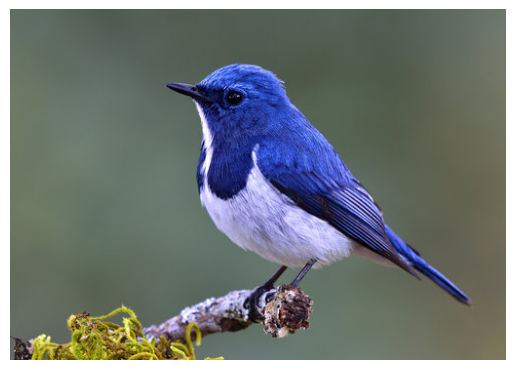

In [18]:
plot_image(filtered_birds[0])

In [19]:
def center_crop(image, new_width, new_height):
    width, height = image.size
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    cropped_image = image.crop((left, top, right, bottom))
    logging.info(f"Center cropped image to {new_width}x{new_height}")
    return cropped_image

2024-03-09 21:56:59,188 - INFO - Center cropped image to 224x224


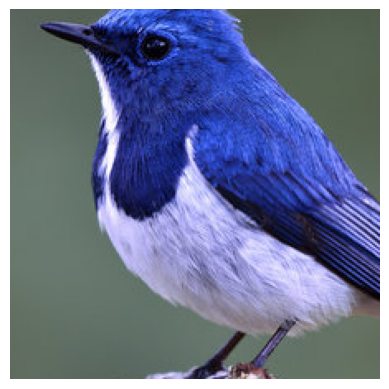

In [20]:
min_size = 224

plot_image(center_crop(filtered_birds[0], min_size, min_size))

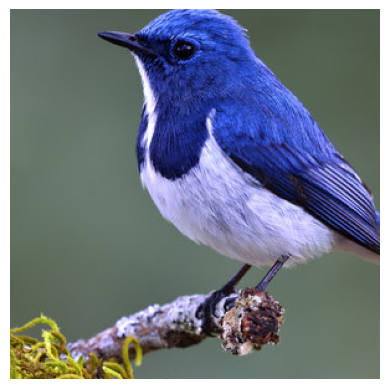

In [21]:
from smartcrop import detect

cropped_image = detect(filtered_birds[0], square=True)
plot_image(cropped_image)

In [22]:
cropped_cats = list(map(lambda x: detect(x, square=True), tqdm(filtered_cats)))
cropped_dogs = list(map(lambda x: detect(x, square=True), tqdm(filtered_dogs)))
cropped_birds = list(map(lambda x: detect(x, square=True), tqdm(filtered_birds)))
cropped_horses = list(map(lambda x: detect(x, square=True), tqdm(filtered_horses)))

100%|██████████| 221/221 [00:29<00:00,  7.61it/s]


In [23]:
import numpy as np

In [24]:
def save_image(image, save_path):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    if not isinstance(image, Image.Image):
        raise ValueError("Input image must be a numpy array or PIL Image")

    if image.mode != "RGB":
        image = image.convert("RGB")

    image.save(save_path)
    logging.info(f"Saved image to {save_path}")

In [25]:
def create_directory(dir_path):
    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)
        print(f"Directory created: {dir_path}")
    else:
        print(f"Directory already exists: {dir_path}")

In [26]:
def save_images_to_dir(images, dir_path):
    create_directory(dir_path)
    _check_is_dir(dir_path)

    for i, image in tqdm(enumerate(images, 1)):
        save_path = os.path.join(dir_path, f"image_{i}.jpg")
        save_image(image, save_path)
    return True

In [27]:
save_images_to_dir(cropped_dogs, "processed_images/dog")
save_images_to_dir(cropped_cats, "processed_images/cat")
save_images_to_dir(cropped_birds, "processed_images/bird")
save_images_to_dir(cropped_horses, "processed_images/horse")

Directory already exists: processed_images/bird


0it [00:00, ?it/s]2024-03-09 21:57:54,319 - INFO - Saved image to processed_images/bird/image_1.jpg
2024-03-09 21:57:54,328 - INFO - Saved image to processed_images/bird/image_2.jpg
2024-03-09 21:57:54,368 - INFO - Saved image to processed_images/bird/image_3.jpg
2024-03-09 21:57:54,381 - INFO - Saved image to processed_images/bird/image_4.jpg
2024-03-09 21:57:54,406 - INFO - Saved image to processed_images/bird/image_5.jpg
2024-03-09 21:57:54,445 - INFO - Saved image to processed_images/bird/image_6.jpg
6it [00:00, 42.84it/s]2024-03-09 21:57:54,477 - INFO - Saved image to processed_images/bird/image_7.jpg
2024-03-09 21:57:54,524 - INFO - Saved image to processed_images/bird/image_8.jpg
2024-03-09 21:57:54,547 - INFO - Saved image to processed_images/bird/image_9.jpg
2024-03-09 21:57:54,564 - INFO - Saved image to processed_images/bird/image_10.jpg
2024-03-09 21:57:54,624 - INFO - Saved image to processed_images/bird/image_11.jpg
11it [00:00, 33.19it/s]2024-03-09 21:57:54,643 - INFO - 

True